In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import cumtrapz
from scipy.integrate import solve_ivp

In [2]:
# parameters
nu = 1e-6 # m^2/s
G = 50e-3 # W/m^2
ubtaub = 0.08 # W/m^2
rhoi = 917 # kg/m^3
rhow = 1000 # kg/m^3
mu = rhow*nu # Pa*s
Latent = 334000 # J/kg
A = 2.4e-24 # ice softness
omega = 1/1000 # transition to Reynolds number
Q = 3e-2 # m^3/s
N0 = 500*1000 # Pa, effective pressure
rd = 2*1000 # m
rt = (omega*Q)/(2*np.pi*nu) # m
R = rt/rd
print('R = '+str(R))

# gap opening
b_scale = (G + ubtaub)/((rhoi*Latent*A)*(N0**3)) # m
print('b = '+str(b_scale)+' m')

# melt scale
M = (12*mu*Q)/(2*np.pi*(b_scale**3)*N0)
print('M = '+str(M))

# dissipation (new)
D = (Q*N0)/(2*np.pi*(G+ubtaub)*(rd**2))
# print('D = '+str(F*M))
print('D = '+str(D))

R = 0.0023873241463784303
b = 0.001414836629902681 m
M = 0.040460732667225115
D = 0.004591007973804673


/var/folders/j9/5s74bpd95vg7_h1cdc1r852000g8_2/T/ipykernel_34646/3353571703.py:2: RuntimeWarning: invalid value encountered in power
  Ngt_neg9 = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(9/8)
/Users/f003vv9/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/var/folders/j9/5s74bpd95vg7_h1cdc1r852000g8_2/T/ipykernel_34646/3353571703.py:1: RuntimeWarning: invalid value encountered in power
  Ngt = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(-1/8)
/var/folders/j9/5s74bpd95vg7_h1cdc1r852000g8_2/T/ipykernel_34646/3353571703.py:1: RuntimeWarning: invalid value encountered in double_scalars
  Ngt = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(-1/8)


[nan]
[0.20986548]


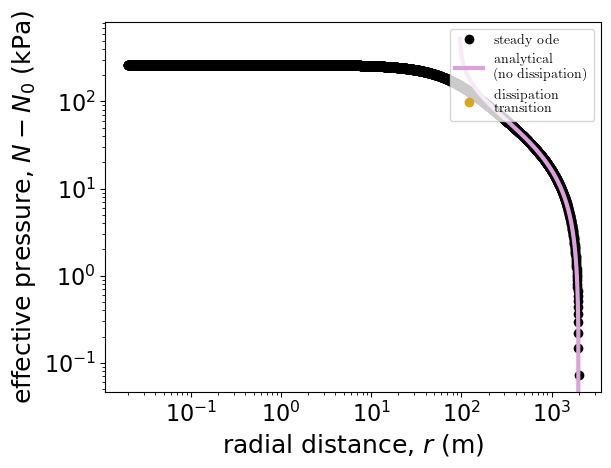

In [3]:
Ngt = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(-1/8)
Ngt_neg9 = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(9/8)
def disspmatters(r):
    rhs = (D*M*((1+(R/r))/(r**2)))
    output = rhs-Ngt_neg9(r)
    return output

rguess = (R*D*M)**(1/3)
# print(rguess)
rdiss = fsolve(disspmatters,rguess)
# print(rdiss)
rp = np.logspace(-5.2,0,1000)
# plt.loglog(rv,N,'ko',label='shakti time relaxation')

def Nfun(r,N):
    a = (D/r)
    b = (M/r)*(1+(R/r))*(N**9)
    find_deriv = lambda x : ((1+(a*x))**3)*x - b
    jac = lambda x : ((1+a*x)**3) + 3*((1+a*x)**2)*a*x
    if r<R:
        approx = (((R*M*abs(r))/(D**3))**(1/4))*(N**(9/4))
    else:
        approx = (M/r)*(1+(R/r))*(N**9)
        
    dNdr = -fsolve(find_deriv,approx,fprime=jac)
    return dNdr

f = plt.figure()
sol = solve_ivp(Nfun,[1,1e-15],[1],max_step=1e-4,t_eval=np.logspace(0,-5,3200),method='RK45')
plt.plot(sol.t*rd,(sol.y[0,:]-1)*N0/1000,'ko',label='steady ode')

plt.loglog(rp*rd,(Ngt(rp)-1)*N0/1000,linewidth=3,color='plum',label='analytical\n (no dissipation)')
# plt.plot(rdiss,Ngt(rdiss),'y*')
plt.plot(rguess*rd,(Ngt(rguess)-1)*N0/1000,'o',color='goldenrod',label='dissipation\n transition')
plt.plot([(1e-5)*rd,rguess*rd],[(Ngt(rguess)-1)*N0/1000,(Ngt(rguess)-1)*N0/1000],color='goldenrod',linewidth=2)
# how close is the guess for the perturbation
print(Ngt(rdiss)-1)
Npg = -M*(np.log(rdiss)+R-(R/rdiss)) # perturbation guess
print(Npg)

# plt.ylim([1e-2,1e1])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='upper right')
plt.xlabel('radial distance, $r$ (m)',fontsize=18)
plt.ylabel('effective pressure, $N-N_0$ (kPa)',fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
f.savefig("scaled_effp_analytic.pdf",bbox_inches='tight')

/var/folders/j9/5s74bpd95vg7_h1cdc1r852000g8_2/T/ipykernel_34646/3250519585.py:32: RuntimeWarning: invalid value encountered in double_scalars
  Nfullpg[i] = (1+8*M*(np.log(rguess)+R-(R/rguess)))**(-1/8) - 1
/var/folders/j9/5s74bpd95vg7_h1cdc1r852000g8_2/T/ipykernel_34646/3250519585.py:40: RuntimeWarning: invalid value encountered in power
  Ngt_neg9 = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(9/8)
/var/folders/j9/5s74bpd95vg7_h1cdc1r852000g8_2/T/ipykernel_34646/3250519585.py:46: RuntimeWarning: invalid value encountered in log
  Ndissg[i] = -M*(np.log(rdiss)+R-(R/rdiss)) # dissipation guess


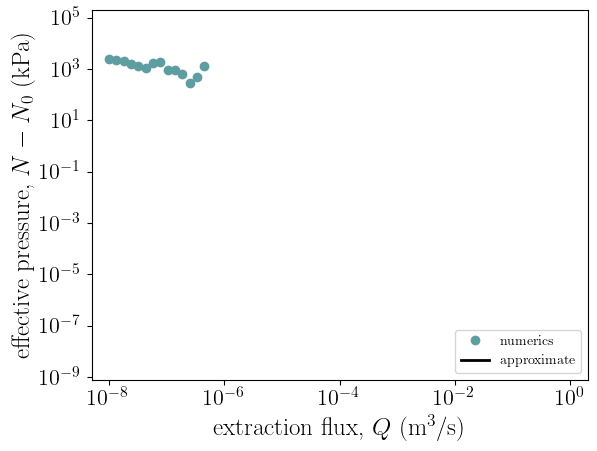

In [5]:
f = plt.figure()
r = np.loadtxt("effp3000kPa_Q.txt")
Qvs = r[0,:]
Nperturb = r[1,:]
# plt.loglog(Qvs,(wellNval-1)*N0/1000,'bo')
plt.loglog(Qvs,Nperturb,'o',color='cadetblue',label='numerics') # ,markeredgecolor='lavender'

num = np.size(Qvs)
Npg = np.zeros(num)
Nfullpg = np.zeros(num)
Npglam = np.zeros(num)
Npgturb = np.zeros(num)
Ndissg = np.zeros(num)
for i in range(num):
    Q = Qvs[i]  # m^3/s
    N0 = 3*1000*1000 # Pa, effective pressure
    rd = 2*1000 # m
    rt = (omega*Q)/(2*np.pi*nu) # m
    R = rt/rd
    
    # gap opening
    b_scale = (G + ubtaub)/((rhoi*Latent*A)*(N0**3)) # m

    # melt scale
    M = (12*mu*Q)/(2*np.pi*(b_scale**3)*N0)

    # dissipation (new)
    D = (Q*N0)/(2*np.pi*(G+ubtaub)*(rd**2))
    
    rguess = (R*D*M)**(1/3)
    Npg[i] = -M*(np.log(rguess)+R-(R/rguess)) # perturbation guess
    Nfullpg[i] = (1+8*M*(np.log(rguess)+R-(R/rguess)))**(-1/8) - 1
    
    rglam = (D*M)**(1/2)
    Npglam[i] = -M*(np.log(rglam)) # perturbation guess
    
    # Npgturb[i] = ((1-(((R*M)/(D**3))**(1/4)))**(-5/4))-1 # turbulent guess
    # print(((R*M)/(D**3))**(1/4))
    Ngt = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(-1/8)
    Ngt_neg9 = lambda x: (1 + 8*M*(np.log(abs(x)) + R  - (R/x)))**(9/8)
    def disspmatters(r):
        rhs = (D*M*((1+(R/r))/(r**2)))
        output = rhs-Ngt_neg9(r)
        return output
    rdiss = fsolve(disspmatters,rguess)
    Ndissg[i] = -M*(np.log(rdiss)+R-(R/rdiss)) # dissipation guess
    
plt.loglog(Qvs,Nfullpg*N0/1000,'k',linewidth=2,label='approximate')
# plt.loglog(Qvs,Npgturb*N0/1000,'g',linewidth=2)
# plt.loglog(Qvs,Nfullpg*N0/1000,'b',linewidth=2)
# plt.loglog(Qvs,Npglam*N0/1000,'b:',linewidth=2)
# plt.loglog(Qvs,Ndissg*N0/1000,'r',linewidth=2)

plt.ylim([0.8e-9,2e5]); plt.yticks(np.logspace(-9,5,8))
plt.xlim([5e-9,2e0]); plt.xticks(np.logspace(-8,0,5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.legend(loc='upper right')
plt.xlabel('extraction flux, $Q$ (m$^3$/s)',fontsize=18)
plt.ylabel('effective pressure, $N-N_0$ (kPa)',fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(loc='lower right')
f.savefig("effp_flux_%dkPa.pdf"%(N0/1000),bbox_inches='tight')

R = 7.957747154594769e-10
b = 1.1318693039221449e-05 m
M = 0.005268324566044937
D = 7.651679956341123e-09
N/N_0 = 1.080992005900924
R = 1.066041871299949e-09
b = 1.1318693039221449e-05 m
M = 0.007057593650433134
D = 1.0250402608653355e-08
N/N_0 = 1.1232518678636796
R = 1.4280992462904796e-09
b = 1.1318693039221449e-05 m
M = 0.009454548122502545
D = 1.3731723522023839e-08
N/N_0 = 1.2059900909760324
R = 1.9131213436940106e-09
b = 1.1318693039221449e-05 m
M = 0.012665574787694171
D = 1.8395397535519327e-08
N/N_0 = 1.481334519816723
R = 2.5628703923796528e-09
b = 1.1318693039221449e-05 m
M = 0.016967155132551474
D = 2.464298454211204e-08
N/N_0 = 4.956506715120787
R = 3.4332922319781446e-09
b = 1.1318693039221449e-05 m
M = 0.02272967142176408
D = 3.3012425307482156e-08
N/N_0 = 1.8793896308572586
R = 4.599333460330266e-09
b = 1.1318693039221449e-05 m
M = 0.030449298005780015
D = 4.422436019548332e-08
N/N_0 = 1.815799461042169
R = 6.161394617761811e-09
b = 1.1318693039221449e-05 m
M = 0.04079

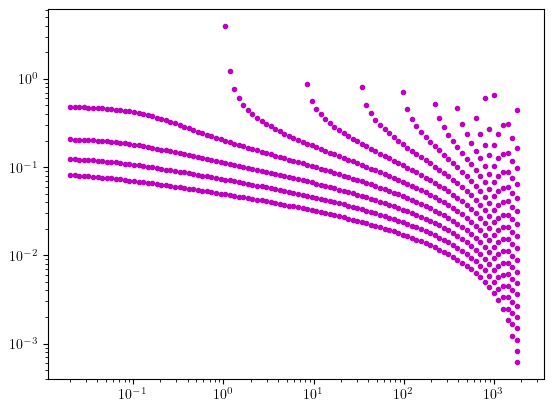

In [105]:
num = 64
Qvs = np.logspace(-8,0,num)
wellNval = np.zeros(num)
for i in range(num):
    Q = Qvs[i]  # m^3/s
    N0 = 2.5*1000*1000 # Pa, effective pressure
    rd = 2*1000 # m
    rt = (omega*Q)/(2*np.pi*nu) # m
    R = rt/rd
    print('R = '+str(R))
    
    # gap opening
    b_scale = (G + ubtaub)/((rhoi*Latent*A)*(N0**3)) # m
    print('b = '+str(b_scale)+' m')

    # melt scale
    M = (12*mu*Q)/(2*np.pi*(b_scale**3)*N0)
    print('M = '+str(M))

    # dissipation (new)
    D = (Q*N0)/(2*np.pi*(G+ubtaub)*(rd**2))
    print('D = '+str(D))

    def Nfun(r,N):
        a = (D/r)
        b = (M/r)*(1+(R/r))*(N**9)
        find_deriv = lambda x : ((1+(a*x))**3)*x - b
        jac = lambda x : ((1+a*x)**3) + 3*((1+a*x)**2)*a*x
        if r<R:
            approx = (((R*M*abs(r))/(D**3))**(1/4))*(N**(9/4))
        else:
            approx = (M/r)*(1+(R/r))*(N**9)
        
        dNdr = -fsolve(find_deriv,approx,fprime=jac)
        return dNdr

    sol = solve_ivp(Nfun,[1,1e-15],[1],max_step=1e-5,t_eval=np.logspace(0,-5,100),method='BDF')
    # sol = solve_ivp(Nfun,[1,1e-5],[1],max_step=1e-4,t_eval=np.logspace(0,-5,100),method='RK45')
    plt.loglog(sol.t*rd,sol.y[0,:]-1,'m.',label='steady ode numerics')
    print('N/N_0 = '+str(sol.y[0,-1]))
    wellNval[i] = sol.y[0,-1]

# np.savetxt('effp%d.txt'%(prms.EffP/1000), (prms.EffP/prms.EffPc,V*bracket.V*prms.y2s*1000,h*bracket.z))
np.savetxt('effp%dkPa_Q.txt'%(N0/1000), (Qvs,(wellNval-1)*N0/1000))